In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import glob
import os
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    print(len(images), " images to be resized.")

    # 파일마다 모두 112x112 사이즈로 바꾸어 저장합니다.
    target_size=(112,112)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor_size"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

2574  images to be resized.
2574  images resized.
가위 이미지 resize 완료!


In [3]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    print(len(images), " images to be resized.")

    # 파일마다 모두 112x112 사이즈로 바꾸어 저장합니다.
    target_size=(112,112)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_size"
resize_images(image_dir_path)

print("주먹 이미지 resize 완료!")

2482  images to be resized.
2482  images resized.
주먹 이미지 resize 완료!


In [4]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    print(len(images), " images to be resized.")

    # 파일마다 모두 112x112사이즈로 바꾸어 저장합니다.
    target_size=(112,112)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper_size"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

2796  images to be resized.
2796  images resized.
보 이미지 resize 완료!


가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

def load_data(img_path, number_of_data=7852):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=112
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_size/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_size/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_size/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,random_state=66,test_size=0.2)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_val shape: {}".format(x_val.shape))
print("y_val shape: {}".format(y_val.shape))

학습데이터(x_train)의 이미지 개수는 7852 입니다.
x_train shape: (6281, 112, 112, 3)
y_train shape: (6281,)
x_val shape: (1571, 112, 112, 3)
y_val shape: (1571,)


### <잘 섞여있는지 확인>

라벨:  0


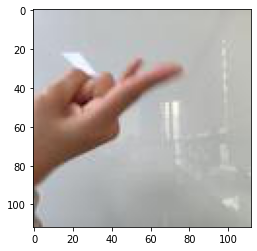

In [6]:
plt.imshow(x_train[8])
print('라벨: ', y_train[8])

라벨:  1


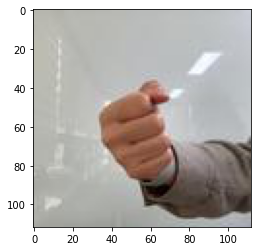

In [7]:
plt.imshow(x_val[10])
print('라벨: ', y_val[10])

In [9]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2/rock"
resize_images(image_dir_path)

212  images to be resized.
212  images resized.


In [10]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2/scissor"
resize_images(image_dir_path)

214  images to be resized.
214  images resized.


In [11]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2/paper"
resize_images(image_dir_path)

246  images to be resized.
246  images resized.


In [12]:
import numpy as np

def load_data(img_path, number_of_data=672):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=112
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test2"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 672 입니다.
x_test shape: (672, 112, 112, 3)
y_test shape: (672,)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 32)        9

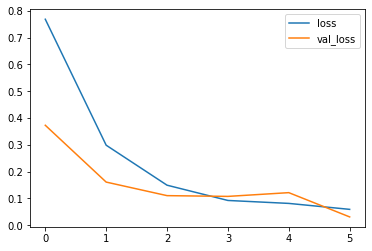

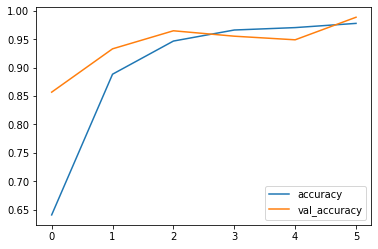

50/50 - 0s - loss: 31.5609 - accuracy: 0.9287
test_loss : 31.56092643737793
test_accuracy : 0.9287078380584717
21/21 - 0s - loss: 2.5944 - accuracy: 0.7158
test_loss: 2.5944066047668457 
test_accuracy: 0.7157738208770752


In [13]:
import pandas as pd

# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_channel_3=32
n_dense=32
n_train_epoch=6

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(112,112,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer= 'adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
history=model.fit(x_train_norm, y_train, batch_size = 7, epochs=n_train_epoch, validation_split = 0.1, verbose =2, validation_data=(x_val, y_val))

history_df = pd.DataFrame(history.history)
history_df['loss'].plot()
history_df['val_loss'].plot()
plt.legend()
plt.show()


history_df = pd.DataFrame(history.history)
history_df['accuracy'].plot()
history_df['val_accuracy'].plot()
plt.legend()
plt.show()

test_loss, test_accuracy = model.evaluate(x_val, y_val, verbose = 2)

print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

결과적으로 정확도가 60% 이상 나왔다.  
처음에 화질을 28*28으로 했을때 conv2d를 늘릴 수 없었고, 정확도가 60%이상이 나오지 않았다.  
화질을 112 * 112 으로 한 다음 conv2d를 깊게 쌓고, max_pooling을 해서 정확도를 높혔다.

## 회고
- 어려웠던 점 : 정확하게 loss 그래프를 그리는 방법에대해 배우지 않아서 직접 찾아 봐야하는 점이 어려웠다. 어려운 test data로 하는 경우 정확도가 떨어진다는 점에서 주어진 test 데이터 또는 원래 train data를 train, val, test로 split 해서 정확도를 판별해야 하는지가 어려웠다.
- 알아낸 점 및 모호한 점 : fit 할 때, validation_split = 0.1을 주는 것과 validation_data를 지정하는 것을 어떤 기준에서 정하는지 모호했다. 사진의 사이즈가 28*28 일때에는 conv2d와 max_pooling을 더 많이 했을 경우에는 에러가 발생하는 점을 알아냈다.
- 노력한 점 : 사진의 화질을 높였지만, 정확도가 60% 이상 나오지 않았다. 그래서 다른 사람들이 한 것을 서로 공유하면서 사이즈가 112*112이므로 conv2d와 max_pooling을 늘려보라는 조언을 듣고 늘려보니, 정확도가 더 늘어날 수 있었다. 
- 자기다짐 : loss의 그래프를 보면서 오버피팅이 되지 않게 epochs을 설정하는 점을 배워서 좋았다. 사람들과 함께 7000장을 넘게 찍어서 많은 데이터량으로 데이터의 다양화를 만족시켜서 뿌듯했다.